# PLN project - Data Understanding

This is the first part of the PLN data mining project. In this notebook, you will find the process of data understanding. 

## Import of the needed packages

In [4]:
#All of the needed packages will be imported here

import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk 
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Read files
The first step to perform the analysis is to proper read the data files.

In [3]:
arxiv = pd.read_csv('ArXiv-10/arxiv100.csv', sep=",")

Without a further treatment, a problem arises. The dates are being treated as numbers. For this reason, it is needed to do something more complex than the default readers from pandas. 

## Analysis of the dataset

In [4]:
arxiv.head()

,title,abstract,label
0,The Pre-He White Dwarfs in Eclipsing Binaries....,We report the first $BV$ light curves and hi...,astro-ph
1,A Possible Origin of kHZ QPOs in Low-Mass X-ra...,A possible origin of kHz QPOs in low-mass X-...,astro-ph
2,The effects of driving time scales on heating ...,Context. The relative importance of AC and D...,astro-ph
3,A new hard X-ray selected sample of extreme hi...,Extreme high-energy peaked BL Lac objects (E...,astro-ph
4,The baryon cycle of Seven Dwarfs with superbub...,"We present results from a high-resolution, c...",astro-ph


In [5]:
arxiv.describe

<bound method NDFrame.describe of                                                    title  \
0      The Pre-He White Dwarfs in Eclipsing Binaries....   
1      A Possible Origin of kHZ QPOs in Low-Mass X-ra...   
2      The effects of driving time scales on heating ...   
3      A new hard X-ray selected sample of extreme hi...   
4      The baryon cycle of Seven Dwarfs with superbub...   
...                                                  ...   
99995  Semiparametric estimation for space-time max-s...   
99996  A spatial causal analysis of wildland fire-con...   
99997               Neural Conditional Event Time Models   
99998  Efficient Estimation of COM-Poisson Regression...   
99999  algcomparison: Comparing the Performance of Gr...   

                                                abstract     label  
0        We report the first $BV$ light curves and hi...  astro-ph  
1        A possible origin of kHz QPOs in low-mass X-...  astro-ph  
2        Context. The relative importa

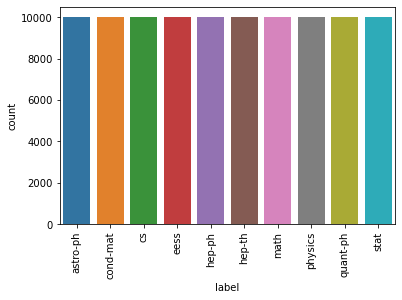

In [6]:
ax = sns.countplot(x = arxiv['label'])
ax.tick_params(axis='x', rotation=90)

In [7]:
arxiv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title     100000 non-null  object
 1   abstract  100000 non-null  object
 2   label     100000 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


## Data pre-processing

### Cleanup and normalization

In [8]:
arxiv['text'] = arxiv['title'] + ' ' + arxiv['abstract']
arxiv.drop(['title', 'abstract'], axis=1, inplace=True)
arxiv.head

<bound method NDFrame.head of           label                                               text
0      astro-ph  The Pre-He White Dwarfs in Eclipsing Binaries....
1      astro-ph  A Possible Origin of kHZ QPOs in Low-Mass X-ra...
2      astro-ph  The effects of driving time scales on heating ...
3      astro-ph  A new hard X-ray selected sample of extreme hi...
4      astro-ph  The baryon cycle of Seven Dwarfs with superbub...
...         ...                                                ...
99995      stat  Semiparametric estimation for space-time max-s...
99996      stat  A spatial causal analysis of wildland fire-con...
99997      stat  Neural Conditional Event Time Models   Event t...
99998      stat  Efficient Estimation of COM-Poisson Regression...
99999      stat  algcomparison: Comparing the Performance of Gr...

[100000 rows x 2 columns]>

Removing non-alphabetic chars

In [9]:
corpus = []
for i in range(0, arxiv['text'].size):
    # get articles' text and remove non alpha chars
    article = re.sub('[^a-zA-Z]', ' ', arxiv['text'][i])
    # add article's text to corpus
    corpus.append(article)

print(corpus[:3])

['The Pre He White Dwarfs in Eclipsing Binaries  I  WASP           We report the first  BV  light curves and high resolution spectra of the post mass transfer binary star WASP         to study the absolute properties of extremely low mass white dwarfs  From the observed spectra  the double lined radial velocities were derived  and the effective temperature and rotational velocity of the brighter  more massive primary were found to be  T   rm eff              pm      K and  v   sin  i         pm     km s         respectively  The combined analysis of the   it TESS  archive data and ours yielded the accurate fundamental parameters of the program target  The masses were derived to about        accuracy and the radii to         or better  The secondary component s parameters of  M            pm        M   odot    R            pm        R   odot    T   rm eff                pm      K  and  L          pm      L   odot  are in excellent agreement with the evolutionary sequence for a helium co

Lowercasing

In [10]:
corpus_lowercase = [sentence.lower() for sentence in corpus]
print(corpus_lowercase[:3])

['the pre he white dwarfs in eclipsing binaries  i  wasp           we report the first  bv  light curves and high resolution spectra of the post mass transfer binary star wasp         to study the absolute properties of extremely low mass white dwarfs  from the observed spectra  the double lined radial velocities were derived  and the effective temperature and rotational velocity of the brighter  more massive primary were found to be  t   rm eff              pm      k and  v   sin  i         pm     km s         respectively  the combined analysis of the   it tess  archive data and ours yielded the accurate fundamental parameters of the program target  the masses were derived to about        accuracy and the radii to         or better  the secondary component s parameters of  m            pm        m   odot    r            pm        r   odot    t   rm eff                pm      k  and  l          pm      l   odot  are in excellent agreement with the evolutionary sequence for a helium co

Removing stopwords

In [11]:
english_stopwords = stopwords.words('english')

def remove_stopwords(sentence):
    # remove stopwords
    cleaned_sentence = [word for word in sentence.split() if word not in english_stopwords]
    return ' '.join(cleaned_sentence)

corpus_no_stopwords = [remove_stopwords(sentence) for sentence in corpus_lowercase]

print(f"Corpus original size: {sum(map(len, corpus_lowercase))}")
print(f"Corpus size after removing stopwords: {sum(map(len, corpus_no_stopwords))}")

print(corpus_no_stopwords[:3])

Corpus original size: 113531860
Corpus size after removing stopwords: 86035089
['pre white dwarfs eclipsing binaries wasp report first bv light curves high resolution spectra post mass transfer binary star wasp study absolute properties extremely low mass white dwarfs observed spectra double lined radial velocities derived effective temperature rotational velocity brighter massive primary found rm eff pm k v sin pm km respectively combined analysis tess archive data yielded accurate fundamental parameters program target masses derived accuracy radii better secondary component parameters pm odot r pm r odot rm eff pm k l pm l odot excellent agreement evolutionary sequence helium core white dwarf mass odot indicates star halfway constant luminosity phase results presented article demonstrate wasp el cvn eclipsing binary thin disk formed stable roche lobe overflow channel composed main sequence dwarf spectral type pre white dwarf', 'possible origin khz qpos low mass x ray binaries possibl

Stemming

In [12]:
stemmer = PorterStemmer()
def stemming(sentence):
    # stemming
    stemmed_sentence = [stemmer.stem(word) for word in sentence.split()]
    return ' '.join(stemmed_sentence)

corpus_stem = [stemming(sentence) for sentence in corpus_no_stopwords]

words_before = ' '.join(corpus_no_stopwords)
words_before = words_before.split()
words_before = list(set(words_before))
size_corpus_before = len(words_before)
print(f"Number tokens before stemming: {size_corpus_before}")

words_after_stem = ' '.join(corpus_stem)
words_after_stem  = words_after_stem.split()
words_after_stem  = list(set(words_after_stem))
size_corpus_after_stem = len(words_after_stem)
print(f"Number tokens after stemming: {size_corpus_after_stem}")

print(corpus_stem[:3])

Number tokens before stemming: 102501
Number tokens after stemming: 74292
['pre white dwarf eclips binari wasp report first bv light curv high resolut spectra post mass transfer binari star wasp studi absolut properti extrem low mass white dwarf observ spectra doubl line radial veloc deriv effect temperatur rotat veloc brighter massiv primari found rm eff pm k v sin pm km respect combin analysi tess archiv data yield accur fundament paramet program target mass deriv accuraci radii better secondari compon paramet pm odot r pm r odot rm eff pm k l pm l odot excel agreement evolutionari sequenc helium core white dwarf mass odot indic star halfway constant luminos phase result present articl demonstr wasp el cvn eclips binari thin disk form stabl roch lobe overflow channel compos main sequenc dwarf spectral type pre white dwarf', 'possibl origin khz qpo low mass x ray binari possibl origin khz qpo low mass x ray binari propos recent numer mhd simul accret disk turbul magnet field mri defin

Stemming is a rule-based approach, whereas lemmatization is a canonical dictionary-based approach. Lemmatization has higher accuracy than stemming. Lemmatization is preferred for context analysis, whereas stemming is recommended when the context is not important.

### Lemmatization

In [13]:
# WordNet lemmatizer

def lemmatizer(sentence):
    # Init the Wordnet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    # tokenize: Split the sentence into words
    word_list = nltk.word_tokenize(sentence)
    # lemmatize list of words
    lemmatized_output = [lemmatizer.lemmatize(w) for w in word_list]
    return ' '.join(lemmatized_output)

corpus_lemm = [lemmatizer(sentence) for sentence in corpus_no_stopwords]

print(f"Number tokens after stop words removal: {size_corpus_before}")
print(f"Number tokens with stemming: {size_corpus_after_stem}")

words_after_lemm = ' '.join(corpus_lemm)
words_after_lemm  = words_after_lemm.split()
words_after_lemm  = list(set(words_after_lemm))
size_corpus_after_lemm = len(words_after_lemm)
print(f"Number tokens with lemmatization: {size_corpus_after_lemm}")

print(corpus_lemm[:3])

Number tokens after stop words removal: 102501
Number tokens with stemming: 74292
Number tokens with lemmatization: 95657
['pre white dwarf eclipsing binary wasp report first bv light curve high resolution spectrum post mass transfer binary star wasp study absolute property extremely low mass white dwarf observed spectrum double lined radial velocity derived effective temperature rotational velocity brighter massive primary found rm eff pm k v sin pm km respectively combined analysis te archive data yielded accurate fundamental parameter program target mass derived accuracy radius better secondary component parameter pm odot r pm r odot rm eff pm k l pm l odot excellent agreement evolutionary sequence helium core white dwarf mass odot indicates star halfway constant luminosity phase result presented article demonstrate wasp el cvn eclipsing binary thin disk formed stable roche lobe overflow channel composed main sequence dwarf spectral type pre white dwarf', 'possible origin khz qpos l

For a dataset of scientific articles like Arxiv, lemmatization is likely to be the better choice compared to stemming. 

Scientific articles tend to contain technical terms and domain-specific language. Lemmatization is more precise in capturing the meaning of these terms, as it considers the part of speech of the word and applies morphological analysis to derive the lemma. Stemming, on the other hand, may produce stems that aren't actual words and may not capture the intended meaning of the term.

Arxiv contains a wide range of technical vocabulary that may not be captured accurately using stemming. Lemmatization is better at preserving the original vocabulary of the text, as it produces actual words as lemmas. Lemmatization also takes into account the part of speech of the word, which can help in accurate identification of parts of speech. This can be important for tasks such as text classification, where the accuracy of the classification depends on identifying the part of speech of the words in the text.

In conclusion, for a dataset of scientific articles like Arxiv, lemmatization is likely to be the better choice compared to stemming. This is because lemmatization is more precise, better at preserving the original vocabulary, and better at capturing the nuances of the language used in scientific articles, since scientific articles typically use more complex language than everyday language. However, it has trade-offs, such as the speed which would be much improved by the use of stemming. We will experiment with both and see which fits our case the best.

In [14]:
corpus = corpus_lemm
print(corpus[:3])
print(len(corpus))

['pre white dwarf eclipsing binary wasp report first bv light curve high resolution spectrum post mass transfer binary star wasp study absolute property extremely low mass white dwarf observed spectrum double lined radial velocity derived effective temperature rotational velocity brighter massive primary found rm eff pm k v sin pm km respectively combined analysis te archive data yielded accurate fundamental parameter program target mass derived accuracy radius better secondary component parameter pm odot r pm r odot rm eff pm k l pm l odot excellent agreement evolutionary sequence helium core white dwarf mass odot indicates star halfway constant luminosity phase result presented article demonstrate wasp el cvn eclipsing binary thin disk formed stable roche lobe overflow channel composed main sequence dwarf spectral type pre white dwarf', 'possible origin khz qpos low mass x ray binary possible origin khz qpos low mass x ray binary proposed recent numerical mhd simulation accretion dis

All at once

In [ ]:
corpus = []
ps = PorterStemmer()
sw = set(stopwords.words('english'))

for i in range(0, arxiv['text'].size):
    # get articles text and remove non alpha chars
    artcl = re.sub('[^a-zA-Z]', ' ', arxiv['text'][i])
    # to lower-case
    artcl = artcl.lower()
    # split into tokens, apply stemming and remove stop words
    artcl = ' '.join([ps.stem(w) for w in artcl.split() if w not in sw])
    corpus.append(artcl)

print(corpus[:3])

### Wordclouds

['eess', 'astro-ph', 'hep-ph', 'quant-ph', 'hep-th', 'cs', 'stat', 'physics', 'math', 'cond-mat']
Wordcloud for category: eess


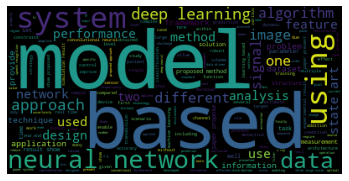

Wordcloud for category: astro-ph


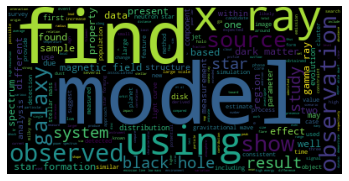

Wordcloud for category: hep-ph


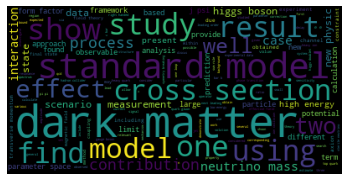

Wordcloud for category: quant-ph


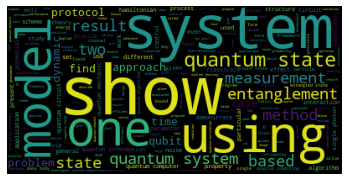

Wordcloud for category: hep-th


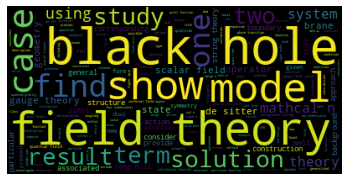

Wordcloud for category: cs


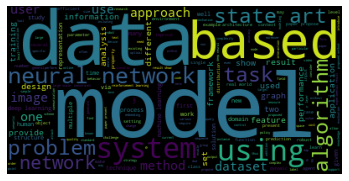

Wordcloud for category: stat


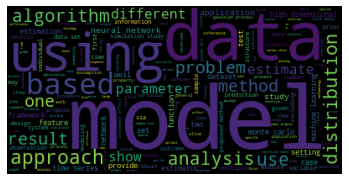

Wordcloud for category: physics


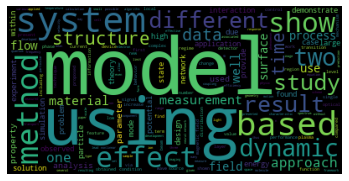

Wordcloud for category: math


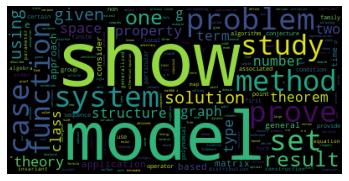

Wordcloud for category: cond-mat


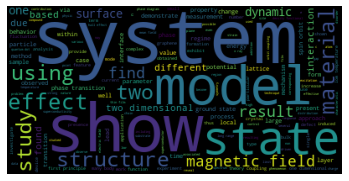

In [15]:
def create_word_cloud(content):
    wordcloud = WordCloud().generate(" ".join(content))

    plt.figure()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

articles_categories = list(set(arxiv['label']))
print(articles_categories)

df_temp = pd.DataFrame(corpus, columns=['text_filtered'])

df_temp2 = pd.concat([arxiv, df_temp], axis=1)

# get text_filtered column values per category
for i in range(0, len(articles_categories)):
    values_per_label = df_temp2['text_filtered'][df_temp2['label'] == articles_categories[i]]
    print(f"Wordcloud for category: {articles_categories[i]}")
    create_word_cloud(values_per_label)

Removing now the original text and leaving only the column text_filtered with the obtained corpus, we get a first cleaned dataset, which will be the baseline for the following observations.

In [16]:
df_parsed = df_temp2.drop(['text'], axis=1)
df_parsed.head()

,label,text_filtered
0,astro-ph,pre white dwarf eclipsing binary wasp report f...
1,astro-ph,possible origin khz qpos low mass x ray binary...
2,astro-ph,effect driving time scale heating coronal arca...
3,astro-ph,new hard x ray selected sample extreme high en...
4,astro-ph,baryon cycle seven dwarf superbubble feedback ...


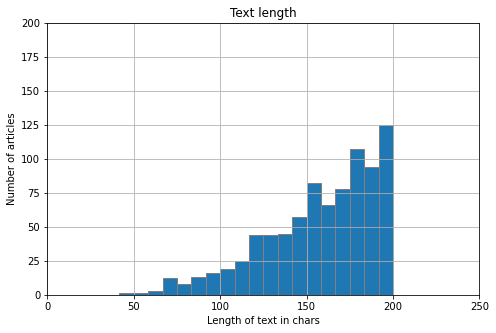

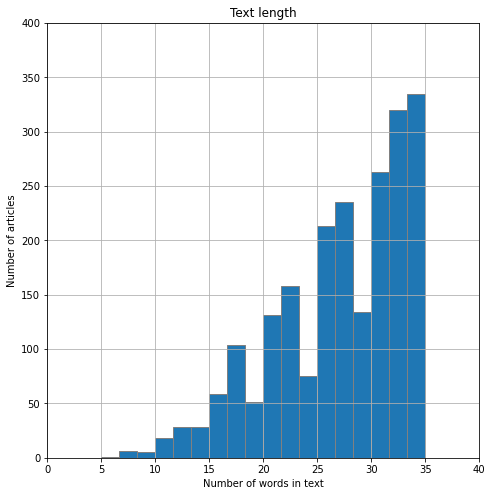

In [17]:
# HISTOGRAM PLOT - LENGTH OF TEXT IN CHARS

hist_len_title = df_parsed['text_filtered'].str.len().hist(bins=24, edgecolor='grey', range=(0, 200), figsize=(8,5))
hist_len_title.set_xlim([0, 250])
hist_len_title.set_ylim([0, 200])
plt.title('Text length')
plt.xlabel('Length of text in chars')
plt.ylabel('Number of articles')
plt.subplots_adjust(left=0.15)
plt.show()

# HISTOGRAM PLOT - LENGTH OF TEXT IN WORDS

hist_len_words_title = df_parsed['text_filtered'].str.split().str.len().hist(bins=21, edgecolor='grey', range=(0, 35), figsize=(8,8))
hist_len_words_title.set_xlim([0, 40])
hist_len_words_title.set_ylim([0, 400])
plt.title('Text length')
plt.xlabel('Number of words in text')
plt.ylabel('Number of articles')
plt.subplots_adjust(left=0.15)
plt.show()

<Figure size 640x480 with 0 Axes>

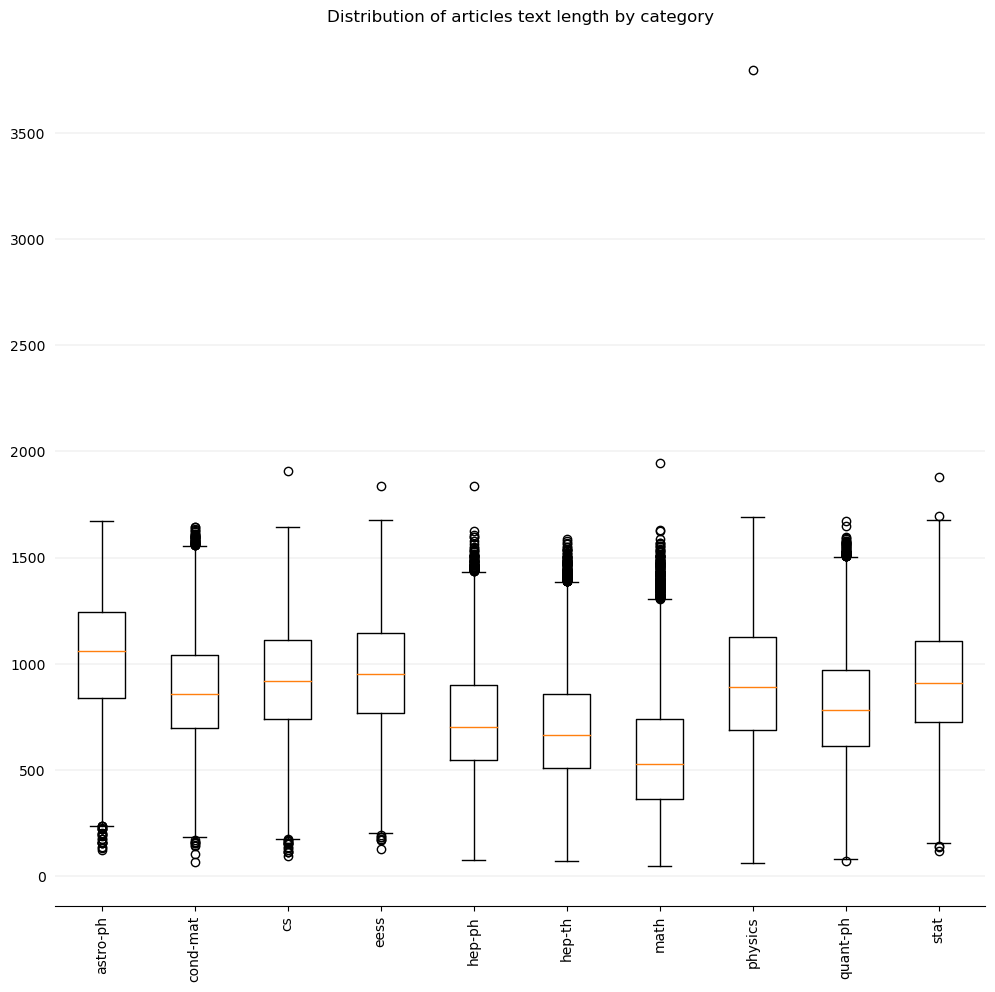

Distribution of articles length summary statistics
   Category  Min     Mean   Max  25th percentile  Median  75th percentile  \
0  astro-ph  123  1033.90  1672            842.0  1062.0          1244.25   
1  cond-mat   70   881.01  1646            698.0   859.0          1042.00   
2        cs   97   925.14  1906            739.0   919.0          1114.25   
3      eess  131   958.96  1837            768.0   951.0          1145.00   
4    hep-ph   78   734.50  1838            548.0   705.0           903.00   
5    hep-th   71   699.56  1589            508.0   667.0           860.00   
6      math   48   577.56  1944            365.0   528.0           741.00   
7   physics   65   910.65  3796            691.0   893.0          1125.00   
8  quant-ph   73   804.35  1675            613.0   784.5           970.00   
9      stat  118   922.12  1880            726.0   912.0          1107.00   

   Interquartile range (IQR)  
0                     402.25  
1                     344.00  
2       

In [18]:
#-----------------------------------
#BOX PLOT - ARTICLES LENGTH (char) BY CATEGORY

#clean plot info
plt.rcParams.update(plt.rcParamsDefault)
plt.figure().clear()
plt.close()
plt.cla()
plt.clf()

category = df_parsed['label'].unique()

df_parsed['text_length']  = df_parsed['text_filtered'].str.len()

# Prepare content length by category datasets
boxplt = {}
for c in category:
    boxplt[c] = df_parsed[df_parsed['label'] == c]['text_length']

# Visualize text length distribution for all categories
fig, ax = plt.subplots(figsize=(12, 12))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_title('Distribution of articles text length by category')
# Set categories names as labels for the boxplot
dataset = boxplt.values()
labels = category
plt.xticks(rotation='vertical')
plt.subplots_adjust(bottom=0.15)
ax.boxplot(dataset, labels=labels)
plt.show()

print('Distribution of articles length summary statistics')

Min = []
Mean = []
Max = []
Twentyfifthpercentile = []
Median = []
seventyfifthpercentile = []
InterquartileRange = []

import numpy as np

for dataset in boxplt.values():

    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)
    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)
    Min.append(min_value)
    Mean.append(mean)
    Max.append(max_value)
    Median.append(median)
    Twentyfifthpercentile.append(quartile_1)
    seventyfifthpercentile.append(quartile_3)
    InterquartileRange.append(iqr)
    

length_per_category_statistics = pd.DataFrame({'Category' : category, 
                                            'Min' : Min,
                                            'Mean' : Mean,
                                            'Max' : Max,
                                            '25th percentile' : Twentyfifthpercentile,
                                            'Median' : Median,
                                            '75th percentile' : seventyfifthpercentile,
                                            'Interquartile range (IQR)' : InterquartileRange})

print(length_per_category_statistics)

Outlier removal based on boxplot

In [ ]:
for c in category:
    # Upper bound
    upper=length_per_category_statistics[length_per_category_statistics['Category'] == c]['75th percentile']+1.5*length_per_category_statistics[length_per_category_statistics['Category'] == c]['Interquartile range (IQR)']
    df_parsed.drop(df_parsed[df_parsed['text_length']>=upper.tolist()[0]].index, inplace = True)
    # Lower bound
    lower=length_per_category_statistics[length_per_category_statistics['Category'] == c]['25th percentile']-1.5*length_per_category_statistics[length_per_category_statistics['Category'] == c]['Interquartile range (IQR)']
    df_parsed.drop(df_parsed[df_parsed['text_length']<=lower.tolist()[0]].index, inplace = True)

In [ ]:
ax = sns.countplot(x = df_parsed['label'])
ax.tick_params(axis='x', rotation=90)

In [ ]:
df_parsed.drop(['text_length'], axis=1, inplace=True)
df_parsed.info()

### Save Results

In [19]:
df_parsed.to_csv("ArXiv-10/arxiv100_parsed.csv", index=False)

### Retrieve Results

In [5]:
df_parsed = pd.read_csv('ArXiv-10/arxiv100_parsed.csv', sep=",")

corpus = []
for i in range(0, df_parsed['text_filtered'].size):
    corpus.append(df_parsed['text_filtered'][i])

print(corpus[:3])

['pre white dwarf eclipsing binary wasp report first bv light curve high resolution spectrum post mass transfer binary star wasp study absolute property extremely low mass white dwarf observed spectrum double lined radial velocity derived effective temperature rotational velocity brighter massive primary found rm eff pm k v sin pm km respectively combined analysis te archive data yielded accurate fundamental parameter program target mass derived accuracy radius better secondary component parameter pm odot r pm r odot rm eff pm k l pm l odot excellent agreement evolutionary sequence helium core white dwarf mass odot indicates star halfway constant luminosity phase result presented article demonstrate wasp el cvn eclipsing binary thin disk formed stable roche lobe overflow channel composed main sequence dwarf spectral type pre white dwarf', 'possible origin khz qpos low mass x ray binary possible origin khz qpos low mass x ray binary proposed recent numerical mhd simulation accretion dis

## Generating a data set

Using the previous baseline of data pre-processing, we will now transform the data in the reduced-vocabulary corpus into a dataset that can be handled by machine learning models. Each review in our corpus is still rather unstructured: it is simply a lists of tokens. We will transform each review into a representation that makes use of the same set of features for the whole dataset. 

Afterwards, we will test all the combinations of the different feature representation techniques with the different models and extract the corresponding metrics, to conclude what works better for our dataset.

### Bag-of-Words model

In [6]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus).toarray()

print(X.shape)

(100000, 95632)


In [22]:
print(vectorizer.get_feature_names_out())

['aa' 'aaa' 'aaaa' ... 'zzy' 'zzz' 'zzzjzzz']


In [24]:
# your code here
features = vectorizer.get_feature_names_out()

article = corpus[123]
article_bag_of_words_rep = X[123]

dict_freqs = dict(zip(features, article_bag_of_words_rep))
tuples = [(k, v) for k, v in dict_freqs.items() if v > 0]

print(f'Article: {article}\nBag of words representation: {tuples}')

Article: probing supermassive star massive black hole seed gravitational wave inspirals propose novel source gravitational wave emission inspirals compact fragment inside primordial supermassive star sm system thought essential channel yet little understood formation supermassive black hole smbhs one model suggests high accretion rate odot yr attainable atomically cooled primordial halo lead formation nuclear burning sm ultimately undergo collapse relativistic instability leaving massive bh remnant recent simulation suggest supermassive star rarely form isolation companion star even black hole formed may captured accreted inspiral sm core due gas dynamical friction explore gw emission produced inspirals could probe formation evolution sm seed first supermassive black hole use semi analytic gas dynamical friction model inspirals sm characterize property find source could potentially observable upcoming space born gw detector formation redshift benefit gravitational lensing merger within

In [25]:
y = df_parsed['label']

print(X.shape, y.shape)

(100000, 95632) (100000,)


In [7]:
def bow_model(corpus):
    vectorizer = CountVectorizer()
    return vectorizer.fit_transform(corpus)

### N-gram models

In [8]:
def ngram_model(N, corpus):
    vectorizer = CountVectorizer(ngram_range=(N,2))
    X = vectorizer.fit_transform(corpus)
    return X

### TF-IDF

In [9]:
def tfidf_model(corpus):

    article = corpus[123]
    vectorizer = TfidfVectorizer()
    tfidf_rep = vectorizer.fit_transform(corpus).toarray()
    article_tfidf_rep = tfidf_rep[123]

    dict_freqs = dict(zip(features, article_tfidf_rep))
    tuples = [(k, v) for k, v in dict_freqs.items() if v > 0]

    print(f'Article: {article}\nTF-IDF representation: {tuples}')
    return tfidf_rep

def tfidf_n_model(N, corpus):
    vectorizer = TfidfVectorizer(ngram_range=(N,2))
    return vectorizer.fit_transform(corpus).toarray()


## Training classifiers

In [16]:
y = df_parsed['label']
category = df_parsed['label'].unique()

In [10]:
def split_dataset(paramX):
    X_train, X_test, y_train, y_test = train_test_split(paramX, y, test_size = 0.20)

    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)

    print("\nLabel distribution in the training set:")
    print(y_train.value_counts())

    print("\nLabel distribution in the test set:")
    print(y_test.value_counts())
    return [X_train, X_test, y_train, y_test]

In classification tasks where every test case is guaranteed to be assigned to exactly one class, computing a micro average is equivalent to computing the accuracy score. This means we get the same result for precision and recall in each model because we are basically computing the accuracy in all cases.

As a consequence, we chose to evaluate the precision and recall of your models with macro average instead.

In [14]:
def run_models(X_train, X_test, y_train, y_test):
    classifiers = [
        MultinomialNB(), LogisticRegression(), DecisionTreeClassifier(), SGDClassifier(), Perceptron(), RandomForestClassifier(), XGBClassifier()
    ]

    for clf in classifiers:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"\n-----{clf.__class__.__name__}-----\n")
        print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
        print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
        print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
        print(f"F1: {f1_score(y_test, y_pred, average='macro')}")

        labels = category
        print("--------Classification Report--------")
        print(classification_report(y_test, y_pred))
        print("--------Confusion Matrix--------")

        plt.figure(figsize=(8,8))
        ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, square=True, fmt="g", cmap="viridis", xticklabels=labels, yticklabels=labels)
        ax.set_xlabel("Predicted", fontsize=14)
        ax.set_ylabel("True", fontsize=14)
        ax.set_title(f"Confusion Matrix {clf.__class__.__name__}", fontsize=16, pad=20)

        plt.show()


--------Bag of Words--------

(80000, 95632) (80000,)
(20000, 95632) (20000,)

Label distribution in the training set:
cond-mat    8036
stat        8020
physics     8015
eess        8012
cs          8008
hep-ph      7994
quant-ph    7984
hep-th      7981
astro-ph    7978
math        7972
Name: label, dtype: int64

Label distribution in the test set:
math        2028
astro-ph    2022
hep-th      2019
quant-ph    2016
hep-ph      2006
cs          1992
eess        1988
physics     1985
stat        1980
cond-mat    1964
Name: label, dtype: int64

-----MultinomialNB-----

Accuracy: 0.82305
Precision: 0.8230532074266949
Recall: 0.8225703688692996
F1: 0.8219619588958539
--------Classification Report--------
              precision    recall  f1-score   support

    astro-ph       0.96      0.90      0.93      2022
    cond-mat       0.82      0.79      0.80      1964
          cs       0.71      0.70      0.70      1992
        eess       0.77      0.80      0.79      1988
      hep-ph      

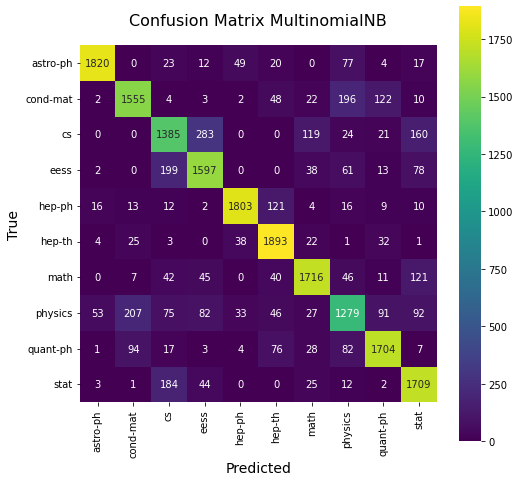

c:\Users\isabe\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



-----LogisticRegression-----

Accuracy: 0.80425
Precision: 0.8037608618382551
Recall: 0.8036567767361514
F1: 0.8036513530821907
--------Classification Report--------
              precision    recall  f1-score   support

    astro-ph       0.94      0.92      0.93      2022
    cond-mat       0.78      0.79      0.78      1964
          cs       0.66      0.66      0.66      1992
        eess       0.73      0.73      0.73      1988
      hep-ph       0.91      0.91      0.91      2006
      hep-th       0.88      0.88      0.88      2019
        math       0.83      0.86      0.84      2028
     physics       0.67      0.66      0.66      1985
    quant-ph       0.86      0.84      0.85      2016
        stat       0.77      0.79      0.78      1980

    accuracy                           0.80     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.80      0.80      0.80     20000

--------Confusion Matrix--------


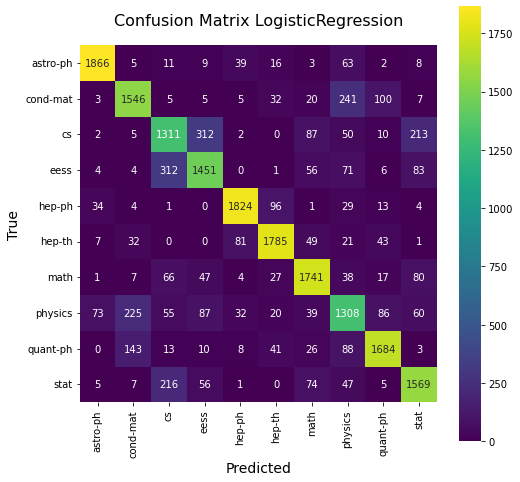


-----DecisionTreeClassifier-----

Accuracy: 0.61585
Precision: 0.6154225487452332
Recall: 0.6149581866137165
F1: 0.6148874535496842
--------Classification Report--------
              precision    recall  f1-score   support

    astro-ph       0.80      0.74      0.77      2022
    cond-mat       0.55      0.55      0.55      1964
          cs       0.45      0.47      0.46      1992
        eess       0.55      0.54      0.55      1988
      hep-ph       0.75      0.71      0.73      2006
      hep-th       0.69      0.71      0.70      2019
        math       0.66      0.69      0.68      2028
     physics       0.39      0.36      0.38      1985
    quant-ph       0.73      0.75      0.74      2016
        stat       0.59      0.62      0.61      1980

    accuracy                           0.62     20000
   macro avg       0.62      0.61      0.61     20000
weighted avg       0.62      0.62      0.62     20000

--------Confusion Matrix--------


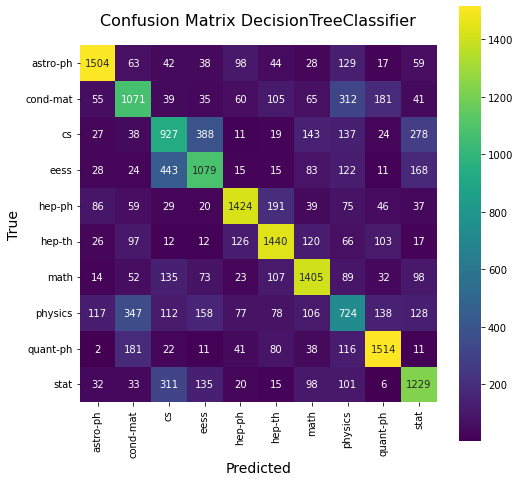


-----SGDClassifier-----

Accuracy: 0.8126
Precision: 0.8108734536278769
Recall: 0.8119720546527249
F1: 0.8107630233018501
--------Classification Report--------
              precision    recall  f1-score   support

    astro-ph       0.95      0.92      0.93      2022
    cond-mat       0.79      0.80      0.79      1964
          cs       0.69      0.66      0.67      1992
        eess       0.73      0.78      0.75      1988
      hep-ph       0.90      0.93      0.91      2006
      hep-th       0.89      0.89      0.89      2019
        math       0.80      0.87      0.83      2028
     physics       0.71      0.62      0.66      1985
    quant-ph       0.85      0.87      0.86      2016
        stat       0.80      0.79      0.80      1980

    accuracy                           0.81     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000

--------Confusion Matrix--------


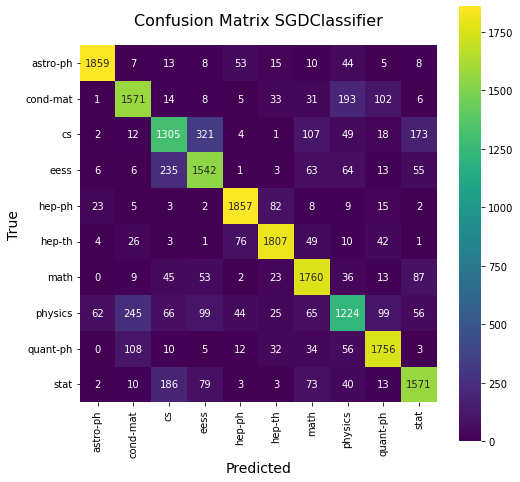


-----Perceptron-----

Accuracy: 0.7839
Precision: 0.7820270915630376
Recall: 0.7832584070756712
F1: 0.7824344363628374
--------Classification Report--------
              precision    recall  f1-score   support

    astro-ph       0.91      0.92      0.92      2022
    cond-mat       0.77      0.77      0.77      1964
          cs       0.64      0.61      0.63      1992
        eess       0.69      0.72      0.71      1988
      hep-ph       0.90      0.91      0.91      2006
      hep-th       0.88      0.87      0.88      2019
        math       0.81      0.81      0.81      2028
     physics       0.64      0.60      0.62      1985
    quant-ph       0.80      0.84      0.82      2016
        stat       0.77      0.76      0.76      1980

    accuracy                           0.78     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.78      0.78      0.78     20000

--------Confusion Matrix--------


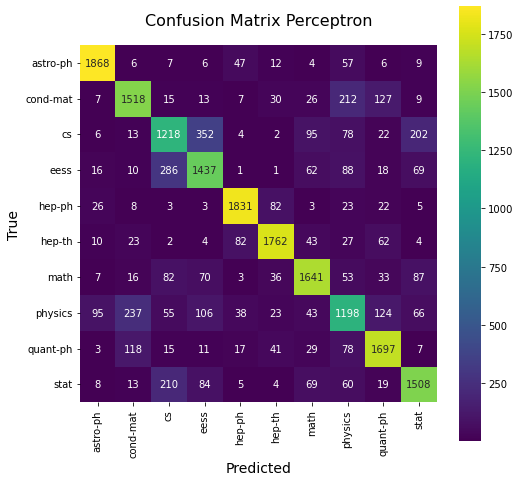

KeyboardInterrupt: 

In [17]:
print("\n--------Bag of Words--------\n")
[X_train, X_test, y_train, y_test] = split_dataset(bow_model(corpus))
run_models(X_train, X_test, y_train, y_test)
print("\n--------Unigram Model--------\n")
[X_train, X_test, y_train, y_test] = split_dataset(ngram_model(1, corpus))
run_models(X_train, X_test, y_train, y_test)
print("\n--------Bigram Model--------\n")
[X_train, X_test, y_train, y_test] = split_dataset(ngram_model(2, corpus))
run_models(X_train, X_test, y_train, y_test)
print("\n--------Trigram Model--------\n")
[X_train, X_test, y_train, y_test] = split_dataset(ngram_model(3, corpus))
run_models(X_train, X_test, y_train, y_test)
print("\n--------TF-IDF Model--------\n")
[X_train, X_test, y_train, y_test] = split_dataset(tfidf_model(corpus))
run_models(X_train, X_test, y_train, y_test)
print("\n--------TF-IDF Unigram Model--------\n")
[X_train, X_test, y_train, y_test] = split_dataset(tfidf_n_model(1,corpus))
run_models(X_train, X_test, y_train, y_test)
print("\n--------TF-IDF Bigram Model--------\n")
[X_train, X_test, y_train, y_test] = split_dataset(tfidf_n_model(2,corpus))
run_models(X_train, X_test, y_train, y_test)
print("\n--------TF-IDF Trigram Model--------\n")
[X_train, X_test, y_train, y_test] = split_dataset(tfidf_n_model(3,corpus))
run_models(X_train, X_test, y_train, y_test)